In [2]:
import pandas as pd

In [3]:
path = r"E:\coding\CSV\Suicide_Detection.csv"
df = pd.read_csv(path)

In [4]:
df

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [18]:
df.loc[232073]

text       I still haven't beaten the first boss in Hollo...
suicide                                                    0
Name: 232073, dtype: object

In [6]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


In [7]:
df.replace({"suicide": 1, "non-suicide": 0}, inplace=True)
df.rename(columns={"class":"suicide"}, inplace=True)

df

,text,suicide
0,Ex Wife Threatening SuicideRecently I left my ...,1
1,Am I weird I don't get affected by compliments...,0
2,Finally 2020 is almost over... So I can never ...,0
3,i need helpjust help me im crying so hard,1
4,"I’m so lostHello, my name is Adam (16) and I’v...",1
...,...,...
232069,If you don't like rock then your not going to ...,0
232070,You how you can tell i have so many friends an...,0
232071,pee probably tastes like salty tea😏💦‼️ can som...,0
232072,The usual stuff you find hereI'm not posting t...,1


In [8]:
df.suicide.value_counts()

suicide
1    116037
0    116037
Name: count, dtype: int64

In [9]:
df.text.isnull().sum()

0

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.text, df.suicide, test_size=0.25)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [12]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("nb_model2", MultinomialNB())
])

In [13]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('nb_model2', MultinomialNB())])

# ----------------------------------------------------------

# score

In [14]:
clf.score(X_test, y_test)

0.9013426636101967

# ----------------------------------------------------------

In [15]:
import matplotlib.pyplot as plt
from sklearn import metrics


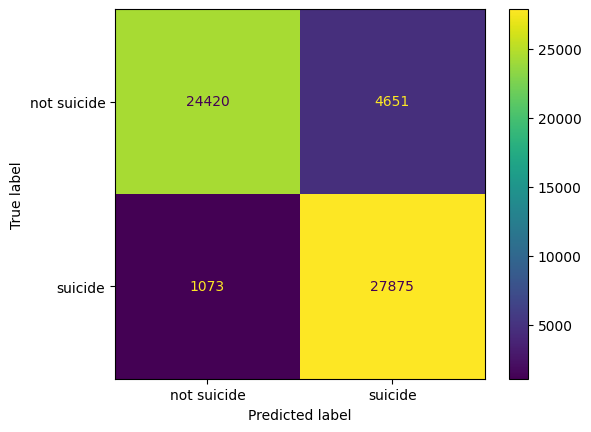

In [16]:
actual = y_test

predicted = clf.predict(X_test)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["not suicide", "suicide"])

cm_display.plot()

plt.show()

In [17]:
y_test.value_counts()

suicide
0    29071
1    28948
Name: count, dtype: int64